### Загрузим основные пакеты

In [1]:
import scipy as sp
import scipy.linalg as spla
import scipy.optimize as spopt
import scipy.stats as spst

import numpy as np
import numpy.linalg as npla

import statsmodels as sm
import statsmodels.api as sma

smfOLS = sma.regression.linear_model.OLS.from_formula
smfLGT = sm.discrete.discrete_model.Logit.from_formula
smfPRB = sm.discrete.discrete_model.Probit.from_formula

import seaborn as sb
import pandas as pd

import matplotlib.pyplot as plt

from inspect import signature as sig

In [2]:
# matplotlib image size and resolution
mpl_options = {"figsize":(8,8), "dpi":100}
sb.set(rc={'figure.figsize':(8,8)})

### Вернемся к нашим облакам

In [3]:
means = np.array([0,0])
covs = np.eye(2)
means, covs

(array([0, 0]),
 array([[1., 0.],
        [0., 1.]]))

In [4]:
size = 100
sample = np.random.multivariate_normal(means, covs, size=size)

### Есть еще один метод, непараметрический, который работает тогда, когда все остальные не работают, когда облака распределены исключительно плохо

In [2]:
df = pd.DataFrame([])
df['X1']=np.hstack((sample[:,0], sample[:,0]+6))
df['X2']= np.hstack((sample[:,1], sample[:,1]+6))
df['Y'] = np.hstack((np.ones(15), np.zeros(size), np.ones(size-15)))
sb.scatterplot(x = 'X1', y='X2', data = df, hue = 'Y')

NameError: name 'pd' is not defined

In [1]:
from sklearn.neighbors import NearestNeighbors as NN

fit = NN(n_neighbors=5, algorithm='ball_tree').fit(df)
nbrs, indx = fit.kneighbors()
nbrs.shape, indx.shape

NameError: name 'df' is not defined

### Этот пакет возвращает для каждой точки ее K ближайших соседей, и затем
- берет моду их группы если это классификатор
- берет среднее их группы если это регрессия

In [128]:
from sklearn.neighbors import KNeighborsClassifier as KNC
nbrs_clf = KNC(n_neighbors = 5).fit(df[['X1', 'X2']], df['Y'])

In [129]:
nbrs_clf.predict(X=[[0,0]]), nbrs_clf.predict(X=[[8,8]])

(array([0.]), array([1.]))

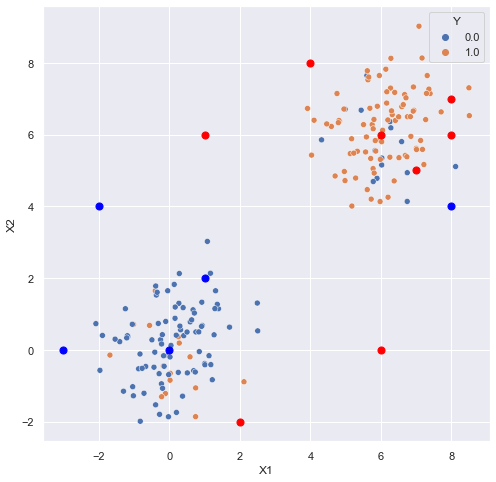

In [130]:
sb.scatterplot(x = 'X1', y='X2', data = df, hue = 'Y')

points = [[1,2],[0,0],[1,6],[-2,4], [-3,0], [6,0], [2,-2], [6,6], [8, 7], [8, 6], [4, 8], [7,5], [8, 4]]

for point in points:

    pred = int(nbrs_clf.predict(X = [point])[0])
    if pred == 0:
        plt.scatter(point[0], point[1], color = 'blue', s = 50)
    else:
        plt.scatter(point[0], point[1], color = 'red', s = 50)

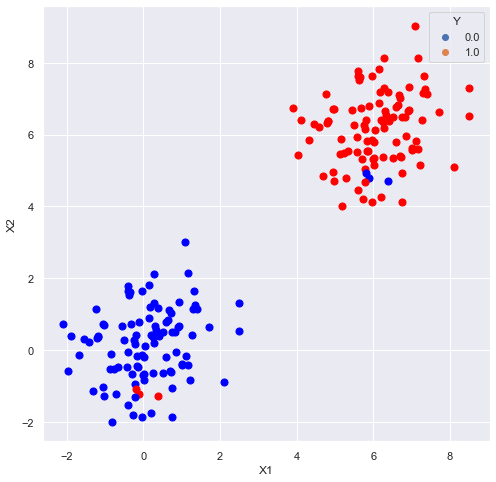

In [131]:
sb.scatterplot(x = 'X1', y='X2', data = df, hue = 'Y')

points = df[['X1', 'X2']].values

for point in points:

    pred = int(nbrs_clf.predict(X = [point])[0])
    if pred == 0:
        plt.scatter(point[0], point[1], color = 'blue', s = 50)
    else:
        plt.scatter(point[0], point[1], color = 'red', s = 50)

### Вопрос на понимание, как выбирать число соседей?